In [2]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from textwrap import shorten as tws
import sys

sys.path.append(sys.path[0] + '/..')

import crossvalidationclass as cvc

In [2]:
data = pd.read_csv("../COVID19_data_PAPER_VERSION.csv",sep=';')
data["Date"] = pd.to_datetime(data["Date"])

In [3]:
crossval = cvc.CrossValidation()
L1colors = crossval.L1colors

In [4]:
data.query("Country=='Austria' and Date>=@pd.Timestamp(2020,3,1) and Date<@pd.Timestamp(2020,4,30)").head(5)

,Country,Date,Population [million],Population Density,GDP pc PPP,HDI,VA,PS,GE,RQ,...,Travel restriction -- Cordon sanitaire,Travel restriction -- Individual movement restrictions,Travel restriction -- National lockdown,Travel restriction -- Port and ship restriction,Travel restriction -- Public transport restriction,Confirmed,Deaths,Recovered,Growth rate,R
335,Austria,2020-03-01,8.9,106.0,55455.0,0.914,1.38,0.92,1.45,1.54,...,False,False,False,False,False,14.0,0.0,0.0,0.372250,NaN
336,Austria,2020-03-02,8.9,106.0,55455.0,0.914,1.38,0.92,1.45,1.54,...,False,False,False,False,False,18.0,0.0,0.0,0.333769,NaN
337,Austria,2020-03-03,8.9,106.0,55455.0,0.914,1.38,0.92,1.45,1.54,...,False,False,False,False,False,21.0,0.0,0.0,0.311393,NaN
338,Austria,2020-03-04,8.9,106.0,55455.0,0.914,1.38,0.92,1.45,1.54,...,False,False,False,False,False,29.0,0.0,0.0,0.305791,NaN
339,Austria,2020-03-05,8.9,106.0,55455.0,0.914,1.38,0.92,1.45,1.54,...,False,False,False,False,False,41.0,0.0,0.0,0.305874,NaN


In [5]:
data.Country.unique()

array(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina',
       'Brazil', 'Canada', 'China', 'Croatia', 'Czechia', 'Denmark',
       'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France',
       'Germany', 'Ghana', 'Greece', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Kazakhstan',
       'Korea, South', 'Kosovo', 'Kuwait', 'Liechtenstein', 'Lithuania',
       'Malaysia', 'Mauritius', 'Mexico', 'Montenegro', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Senegal', 'Serbia', 'Singapore', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Syria', 'Taiwan*',
       'Thailand', 'US - Alabama', 'US - Alaska', 'US - Arizona',
       'US - California', 'US - Colorado', 'US - Connecticut',
       'US - Delaware', 'US - Florida', 'US - Georgia', 'US - Hawaii',
       'US - Idaho', 'US - Illinois', 'US - Indiana', 'US - Iowa',
       'US - Kansas', 'US - Kentucky

In [6]:
data.columns

Index(['Country', 'Date', 'Population [million]', 'Population Density',
       'GDP pc PPP', 'HDI', 'VA', 'PS', 'GE', 'RQ', 'RL', 'CC',
       'Case identification, contact tracing and related measures -- Activate case notification',
       'Case identification, contact tracing and related measures -- Airport health check',
       'Case identification, contact tracing and related measures -- Border health check',
       'Case identification, contact tracing and related measures -- Enhance detection system',
       'Case identification, contact tracing and related measures -- Isolation of cases',
       'Case identification, contact tracing and related measures -- Quarantine',
       'Case identification, contact tracing and related measures -- Restricted testing',
       'Case identification, contact tracing and related measures -- Surveillance',
       'Case identification, contact tracing and related measures -- Tracing and tracking',
       'Environmental measures -- Environmental c

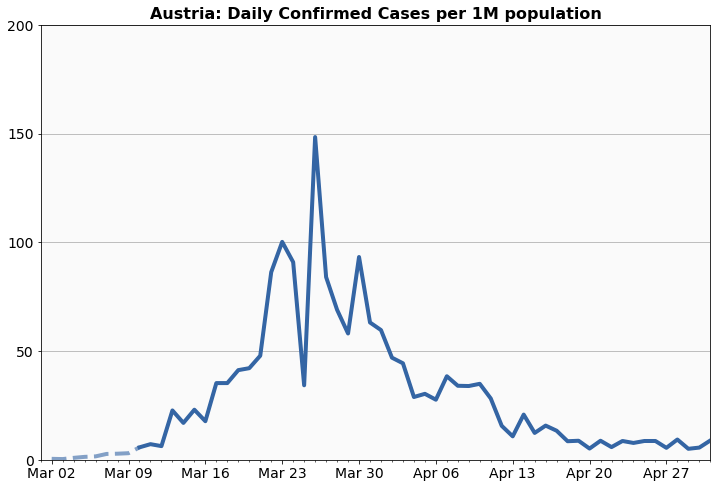

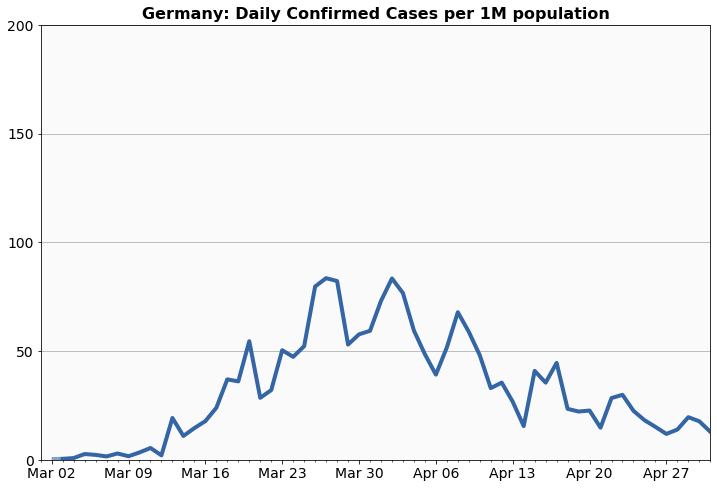

/usr/lib64/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1095: UserWarning: Attempting to set identical left == right == 18323.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


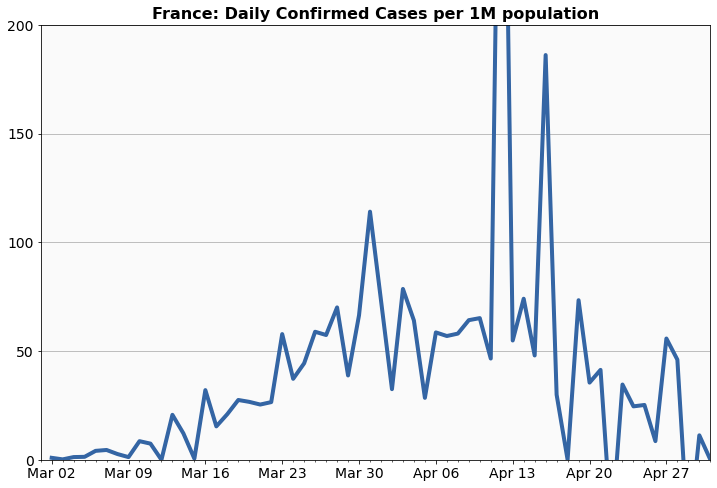

/usr/lib64/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1095: UserWarning: Attempting to set identical left == right == 18323.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


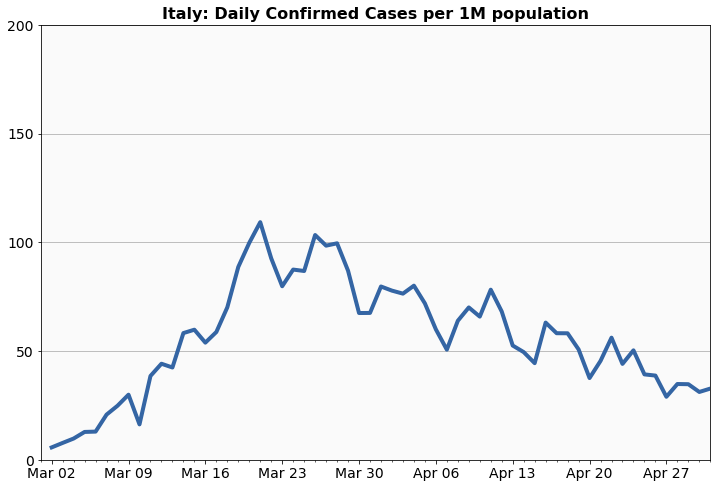

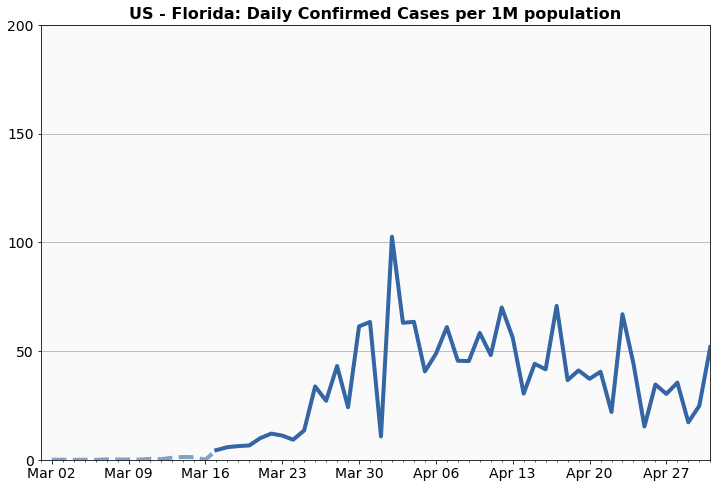

/usr/lib64/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1095: UserWarning: Attempting to set identical left == right == 18323.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


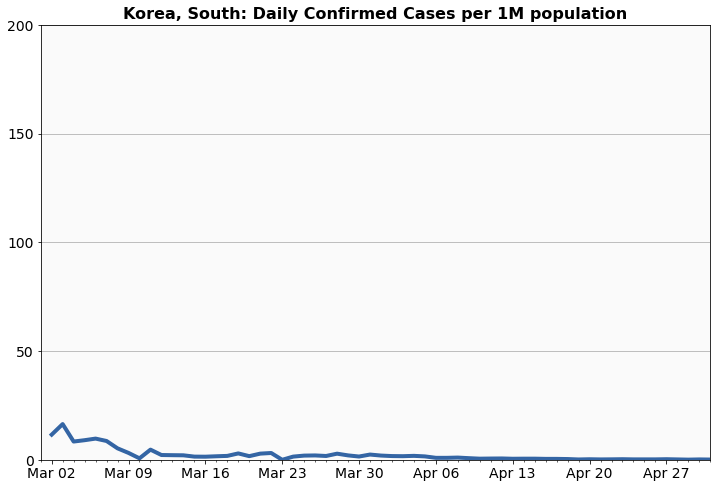

In [7]:
special_countries = ['Austria', 'Germany', 'France', 'Italy', 'US - Florida', 'Korea, South']
startindex = {}
for country in special_countries:

    plotdata  = data.query("Country=='{}'".format(country)).set_index("Date").loc["2020-3-1":"2020-05-01"]
    popsize   = plotdata['Population [million]']
    plotdata  = plotdata.set_index(pd.date_range("2020-03-1","2020-05-01",freq="D")).Confirmed.diff().dropna()
    startindex[country] = plotdata[plotdata > 30].index.values[0]
    plotdata /= popsize
    plotdata1 = plotdata[plotdata.index <= startindex[country]]
    plotdata2 = plotdata[plotdata.index >= startindex[country]]
    plotdata1.plot(linewidth=4,linestyle = '--',figsize=(12,8),color='#3465a4',alpha = .6)
    if len(plotdata2) > 0:
        plotdata2.plot(linewidth=4, color='#3465a4')
    confirmed_max = np.max(plotdata.values)
    ax = plt.gca()
    plt.grid(axis='y')
    plt.title("{}: Daily Confirmed Cases per 1M population".format(country),fontsize=16, weight = 'bold')
    #plt.xlabel("Date",fontsize=16)
    ticks_time = pd.date_range("2020-03-1","2020-05-01",freq="W-MON")
    ticks_label = [x.strftime('%b %d') for x in ticks_time]
    plt.xticks(ticks_time, ticks_label)
    plt.yticks(np.arange(5)*50)
    ax.tick_params(axis="y",labelsize=14)
    ax.tick_params(axis="x",which='major',labelsize=14)
    ax.tick_params(axis="x",which='minor',labelsize=0)
    ax.set_facecolor([.97,.97,.97, .5])
    #ax.plot([pd.Timestamp(2020,3,10),pd.Timestamp(2020,3,10)],[0,1500],color="grey",linestyle="dashed")
    #ax.plot([pd.Timestamp(2020,3,15),pd.Timestamp(2020,3,15)],[0,1500],color="grey",linestyle="dashed")
    plt.axis(ymin=0,ymax=200,xmin=pd.Timestamp(2020,3,1))
    plt.savefig("cov_cases_{}.png".format(country))
    plt.savefig("cov_cases_{}.pdf".format(country))
    plt.show()

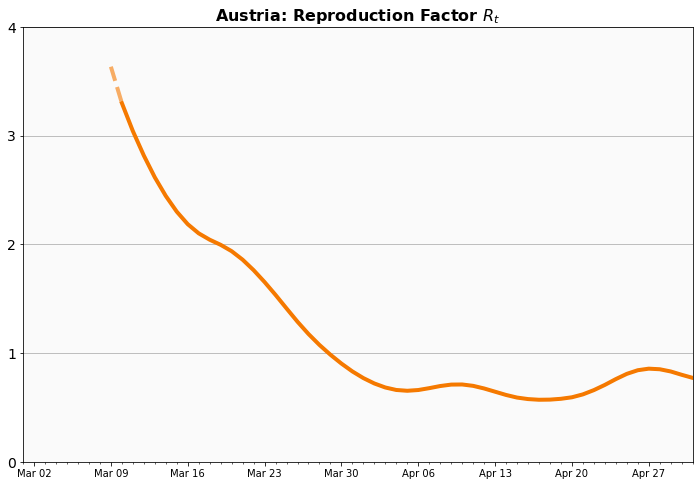

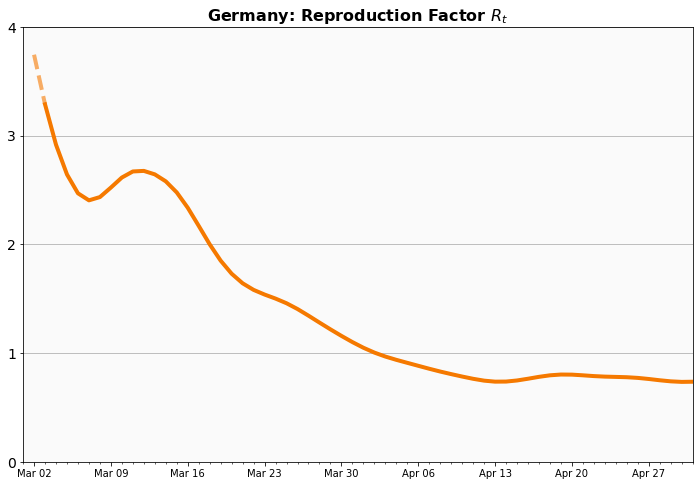

/usr/lib64/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1095: UserWarning: Attempting to set identical left == right == 18323.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


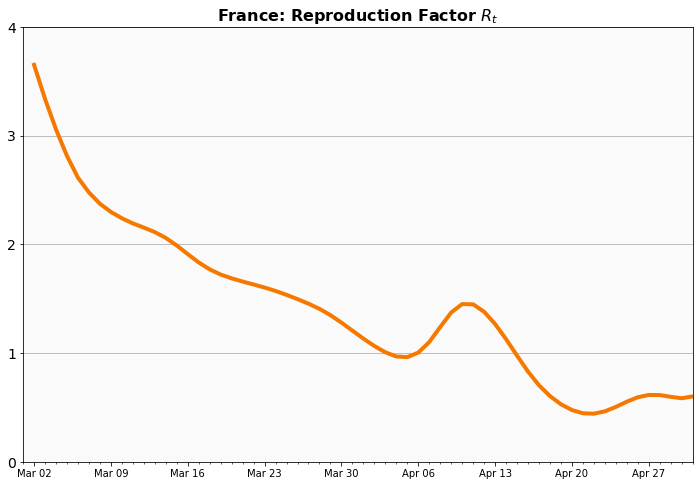

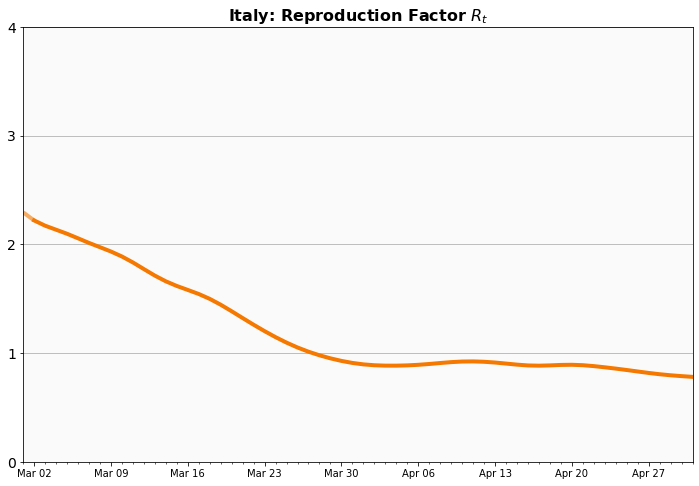

/usr/lib64/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1095: UserWarning: Attempting to set identical left == right == 18338.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


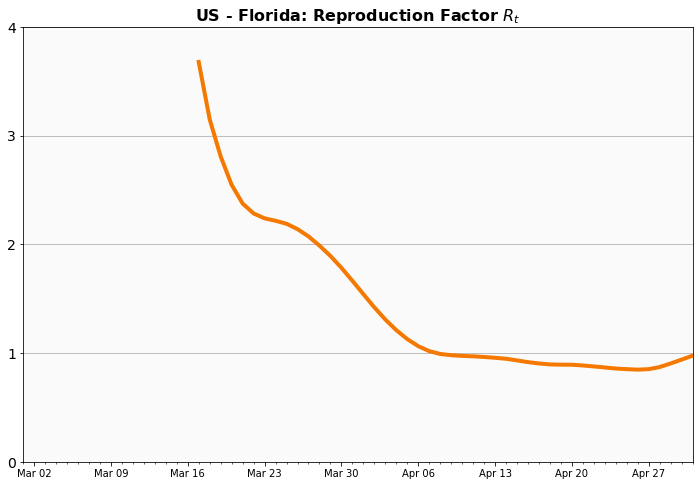

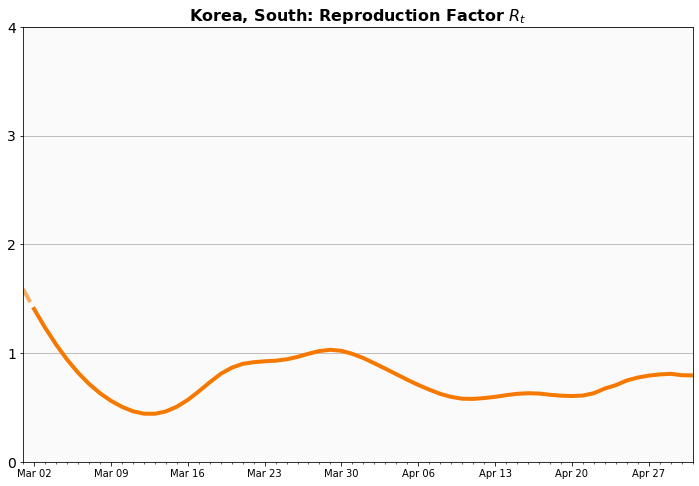

In [8]:
for country in special_countries:

    plotdata  = data.query("Country=='{}'".format(country)).set_index("Date").loc["2020-3-1":"2020-05-01"]
    plotdata  = plotdata.set_index(pd.date_range("2020-03-1","2020-05-01",freq="D")).R.dropna()
    #print(plotdata, startindex[country])
    plotdata1 = plotdata[plotdata.index <= startindex[country]]
    plotdata2 = plotdata[plotdata.index >= startindex[country]]
    
    plotdata1.plot(linewidth=4,linestyle = '--', figsize=(12,8),color='#f57900', alpha = .6)
    plotdata2.plot(linewidth = 4, color = '#f57900')
    
    ax = plt.gca()
    plt.grid(axis='y')
    plt.title(r"{}: Reproduction Factor $R_t$".format(country),fontsize=16, weight = 'bold')
    #plt.xlabel("Date",fontsize=16)
    ticks_time = pd.date_range("2020-03-1","2020-05-01",freq="W-MON")
    ticks_label = [x.strftime('%b %d') for x in ticks_time]

    plt.xticks(ticks_time, ticks_label)
    plt.yticks(np.arange(5))
    ax.tick_params(axis="y",labelsize=14)
    ax.tick_params(axis="x",which='major',labelsize=10)
    ax.tick_params(axis="x",which='minor',labelsize=0)
    ax.set_facecolor([.97,.97,.97, .5])
    #ax.plot([pd.Timestamp(2020,3,10),pd.Timestamp(2020,3,10)],[0,1500],color="grey",linestyle="dashed")
    #ax.plot([pd.Timestamp(2020,3,15),pd.Timestamp(2020,3,15)],[0,1500],color="grey",linestyle="dashed")
    plt.axis(ymin=0,ymax=4,xmin=pd.Timestamp(2020,3,1))
    plt.savefig("cov_Rt_{}.png".format(country))
    plt.savefig("cov_Rt_{}.pdf".format(country))
    plt.show()

In [9]:
datafit = pd.read_csv('../comparison_of_rankings - Main_results.csv')
datafit.head()

,L1 theme,L2 category,Countries with Implementation,Delta_RF,95%CI_Delta_RF,Delta_CC,95%CI_Delta_CC,Rank_RNN,Delta_RNN,95%CI_Delta_RNN,LASSO_median,LASSO_low95,LASSO_high95,LASSO_mean,LASSO_std
0,"Case identification, contact tracing and relat...",Activate case notification,18,0.002097,0.001364,0.0,0.0,51,0.0633,0.0021,0.0000,0.0000,0.0000,0.0000,0.000
1,"Case identification, contact tracing and relat...",Airport health check,52,0.003804,0.001559,0.0,0.0,50,0.0502,0.0010,0.0000,0.0000,0.0000,0.0000,0.000
2,"Case identification, contact tracing and relat...",Border health check,24,0.001305,0.001344,0.0,0.0,4,-0.0875,0.0027,0.0000,0.0000,0.0000,0.0000,0.000
3,"Case identification, contact tracing and relat...",Enhance detection system,24,0.000221,0.001726,0.0,0.0,49,0.0443,0.0015,0.0465,0.0239,0.0656,0.0459,0.009
4,"Case identification, contact tracing and relat...",Isolation of cases,17,0.001270,0.001445,0.0,0.0,40,0.0114,0.0011,0.0000,0.0000,0.0000,0.0000,0.000


In [10]:
datafit.columns

Index(['L1 theme', 'L2 category', 'Countries with Implementation', 'Delta_RF',
       '95%CI_Delta_RF', 'Delta_CC', '95%CI_Delta_CC', 'Rank_RNN', 'Delta_RNN',
       '95%CI_Delta_RNN', 'LASSO_median', 'LASSO_low95', 'LASSO_high95',
       'LASSO_mean', 'LASSO_std'],
      dtype='object')

In [11]:
def getImplementDate(countries, datefmt = '%b %d'):
    
    NPIs = np.array([measurename.split(' -- ') for measurename in data.columns if ' -- ' in measurename]).T
    retDF = pd.DataFrame({'L1 theme':NPIs[0], 'L2 category': NPIs[1]})
    
    if isinstance(countries, (list, tuple)):
        for country in countries:
            retDF = retDF.merge(getImplementDate(country, datefmt), on = ['L1 theme', 'L2 category'])
    else:
        data_country_tmp = data.query('Country == "{}"'.format(countries))
        dates = []
        for m in [measurename for measurename in data.columns if ' -- ' in measurename]:
            m_dates = data_country_tmp[data_country_tmp[m]]['Date']
            if not datefmt is None:
                m_dates = m_dates.apply(lambda x:x.strftime(datefmt))
            if len(m_dates) > 0:
                dates.append(m_dates.values[0])
            else:
                dates.append(None)
        retDF[countries] = dates
        
    return retDF

In [12]:
getImplementDate(special_countries, datefmt=None)

,L1 theme,L2 category,Austria,Germany,France,Italy,US - Florida,"Korea, South"
0,"Case identification, contact tracing and relat...",Activate case notification,2020-01-28,2020-01-31,NaT,NaT,NaT,NaT
1,"Case identification, contact tracing and relat...",Airport health check,2020-01-27,2020-02-02,2020-01-25,2020-01-22,2020-02-02,2020-02-12
2,"Case identification, contact tracing and relat...",Border health check,2020-03-10,2020-02-27,NaT,2020-02-04,NaT,2020-02-28
3,"Case identification, contact tracing and relat...",Enhance detection system,NaT,2020-01-31,2020-02-08,NaT,2020-03-18,2020-02-25
4,"Case identification, contact tracing and relat...",Isolation of cases,2020-01-28,2020-01-27,2020-01-27,2020-02-08,NaT,2020-02-24
5,"Case identification, contact tracing and relat...",Quarantine,2020-03-19,2020-01-02,NaT,2020-01-21,2020-02-02,2020-02-04
6,"Case identification, contact tracing and relat...",Restricted testing,NaT,NaT,NaT,NaT,NaT,2020-02-12
7,"Case identification, contact tracing and relat...",Surveillance,NaT,NaT,2020-01-02,2020-05-04,NaT,NaT
8,"Case identification, contact tracing and relat...",Tracing and tracking,2020-02-27,2020-02-24,2020-01-25,2020-04-17,NaT,2020-02-04
9,Environmental measures,Environmental cleaning and disinfection,NaT,NaT,NaT,2020-03-08,NaT,2020-02-20


In [13]:
datafit.merge(getImplementDate(special_countries), on = ['L1 theme', 'L2 category']).head()

,L1 theme,L2 category,Countries with Implementation,Delta_RF,95%CI_Delta_RF,Delta_CC,95%CI_Delta_CC,Rank_RNN,Delta_RNN,95%CI_Delta_RNN,...,LASSO_low95,LASSO_high95,LASSO_mean,LASSO_std,Austria,Germany,France,Italy,US - Florida,"Korea, South"
0,"Case identification, contact tracing and relat...",Activate case notification,18,0.002097,0.001364,0.0,0.0,51,0.0633,0.0021,...,0.0000,0.0000,0.0000,0.000,Jan 28,Jan 31,None,None,None,None
1,"Case identification, contact tracing and relat...",Airport health check,52,0.003804,0.001559,0.0,0.0,50,0.0502,0.0010,...,0.0000,0.0000,0.0000,0.000,Jan 27,Feb 02,Jan 25,Jan 22,Feb 02,Feb 12
2,"Case identification, contact tracing and relat...",Border health check,24,0.001305,0.001344,0.0,0.0,4,-0.0875,0.0027,...,0.0000,0.0000,0.0000,0.000,Mar 10,Feb 27,None,Feb 04,None,Feb 28
3,"Case identification, contact tracing and relat...",Enhance detection system,24,0.000221,0.001726,0.0,0.0,49,0.0443,0.0015,...,0.0239,0.0656,0.0459,0.009,None,Jan 31,Feb 08,None,Mar 18,Feb 25
4,"Case identification, contact tracing and relat...",Isolation of cases,17,0.001270,0.001445,0.0,0.0,40,0.0114,0.0011,...,0.0000,0.0000,0.0000,0.000,Jan 28,Jan 27,Jan 27,Feb 08,None,Feb 24


In [14]:
def getPrediction(country, daterange = ('2020-03-01', '2020-05-01'), tau = 13):
    datafit_merged = datafit.merge(getImplementDate(country), on = ['L1 theme', 'L2 category'])
    t    = pd.date_range(start = daterange[0], end = daterange[1], freq='D')
    pred = np.zeros(len(t))
    print(t,pred)

In [15]:
getPrediction('a')

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
      

In [16]:
fitTrajectories = pd.read_csv('FinalTrajectories.csv', sep = ';').set_index('Unnamed: 0')
fitTrajectories['Date'] = pd.to_datetime(fitTrajectories['Date']) + pd.Timedelta('2d')
fitTrajectories

,Country,Date,Observable,"Model (11,-2.25)"
Unnamed: 0,,,,
0,Austria,2020-03-09,3.634095,1.977851
1,Austria,2020-03-10,3.299439,1.977851
2,Austria,2020-03-11,3.042310,1.809368
3,Austria,2020-03-12,2.817171,1.809368
4,Austria,2020-03-13,2.616763,1.809368
...,...,...,...,...
3803,United Kingdom,2020-05-16,0.882567,0.960686
3804,United Kingdom,2020-05-17,0.883492,0.960686
3805,United Kingdom,2020-05-18,0.884102,0.960686


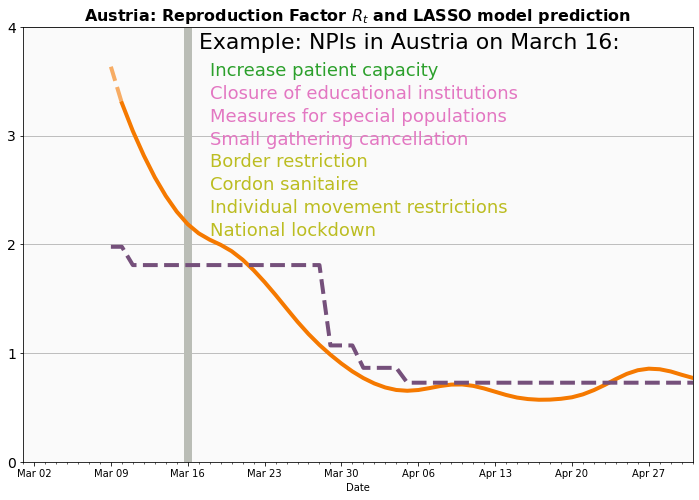

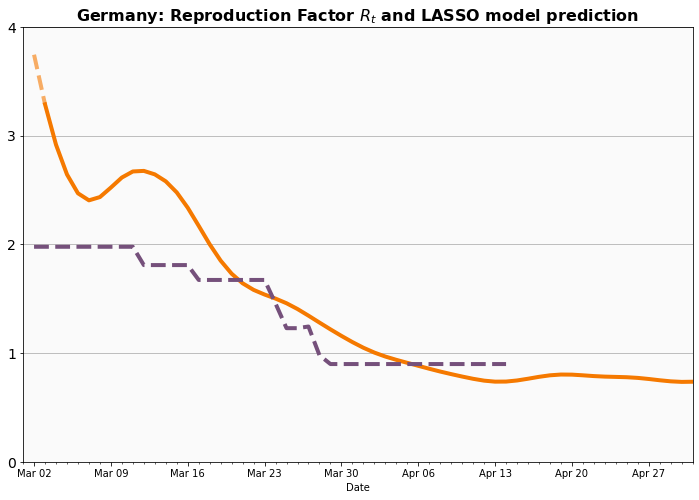

/usr/lib64/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1095: UserWarning: Attempting to set identical left == right == 18323.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


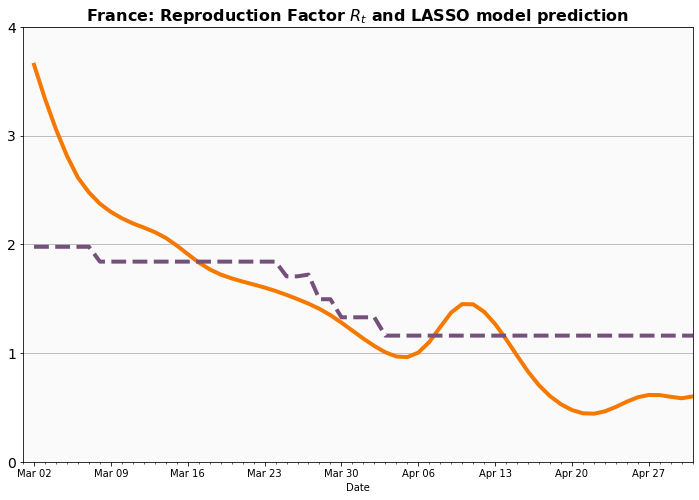

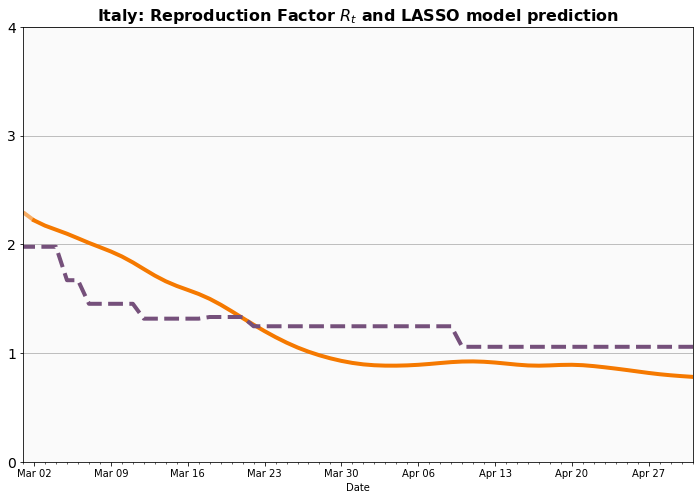

/usr/lib64/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1095: UserWarning: Attempting to set identical left == right == 18338.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


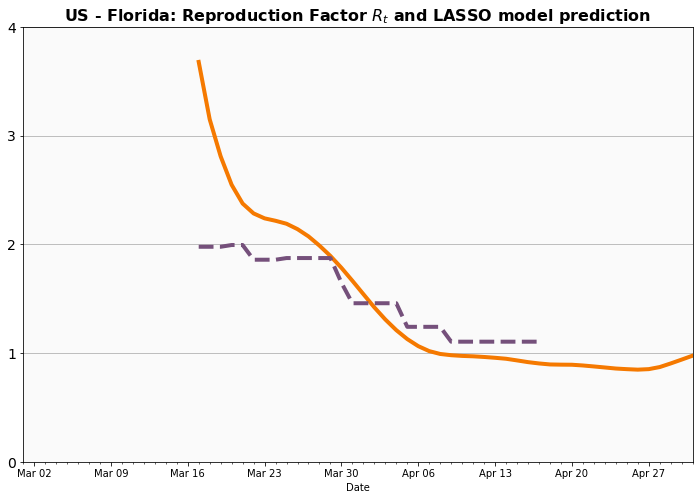

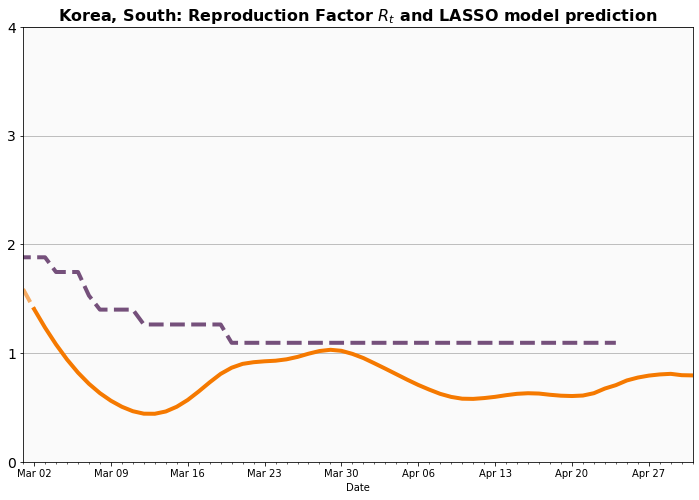

In [17]:
for country in special_countries:

    plotdata  = data.query("Country=='{}'".format(country)).set_index("Date").loc["2020-3-1":"2020-05-01"]
    plotdata  = plotdata.set_index(pd.date_range("2020-03-1","2020-05-01",freq="D")).R.dropna()
    #print(plotdata, startindex[country])
    plotdata1 = plotdata[plotdata.index <= startindex[country]]
    plotdata2 = plotdata[plotdata.index >= startindex[country]]
    #plotdata3 = fitTrajectories.query('Country=="{}"'.format(country)).set_index('Date').Observable
    plotdata4 = fitTrajectories.query('Country=="{}"'.format(country)).set_index('Date')['Model (11,-2.25)']
    
    
    plotdata1.plot(linewidth=4,linestyle = '--', figsize=(12,8),color='#f57900', alpha = .6)
    plotdata2.plot(linewidth = 4, color = '#f57900')
    
    #plotdata3.plot()
    plotdata4.plot(linewidth = 4, color = '#75507b', linestyle = '--')
    
    ax = plt.gca()
    plt.grid(axis='y')
    plt.title(r"{}: Reproduction Factor $R_t$ and LASSO model prediction".format(country),fontsize=16, weight = 'bold')
    #plt.xlabel("Date",fontsize=16)
    ticks_time = pd.date_range("2020-03-1","2020-05-01",freq="W-MON")
    ticks_label = [x.strftime('%b %d') for x in ticks_time]

    plt.xticks(ticks_time, ticks_label)
    plt.yticks(np.arange(5))
    ax.tick_params(axis="y",labelsize=14)
    ax.tick_params(axis="x",which='major',labelsize=10)
    ax.tick_params(axis="x",which='minor',labelsize=0)
    ax.set_facecolor([.97,.97,.97, .5])
    #ax.plot([pd.Timestamp(2020,3,10),pd.Timestamp(2020,3,10)],[0,1500],color="grey",linestyle="dashed")
    #ax.plot([pd.Timestamp(2020,3,15),pd.Timestamp(2020,3,15)],[0,1500],color="grey",linestyle="dashed")
    plt.axis(ymin=0,ymax=4,xmin=pd.Timestamp(2020,3,1),xmax=pd.Timestamp(2020,5,1))
    
    
    if country == 'Austria':
        ax.vlines(pd.Timestamp(2020,3,16),0,4, color= '#babdb6', lw = 8)
        ax.annotate('Example: NPIs in Austria on March 16:',(pd.Timestamp(2020,3,16+1),3.80), fontsize = 22)
        for i,(a,measure) in enumerate(getImplementDate('Austria').query('Austria == "Mar 16"')[['L1 theme', 'L2 category']].iterrows()):
            #print(measure)
            ax.annotate( measure['L2 category'], (pd.Timestamp(2020,3,16+2),3.55-0.21*i), fontsize = 18, color = L1colors[measure['L1 theme']])
    
    plt.savefig("cov_Rt_predLASSO_{}.png".format(country))
    plt.savefig("cov_Rt_predLASSO_{}.pdf".format(country))
    plt.show()

In [18]:
getImplementDate('Austria').query('Austria == "Mar 16"')

,L1 theme,L2 category,Austria
16,Healthcare and public health capacity,Increase patient capacity,Mar 16
31,Social distancing,Closure of educational institutions,Mar 16
34,Social distancing,Measures for special populations,Mar 16
36,Social distancing,Small gathering cancellation,Mar 16
40,Travel restriction,Border restriction,Mar 16
41,Travel restriction,Cordon sanitaire,Mar 16
42,Travel restriction,Individual movement restrictions,Mar 16
43,Travel restriction,National lockdown,Mar 16


In [19]:
for i,(a,m) in enumerate(getImplementDate('Austria').query('Austria == "Mar 16"')[['L1 theme', 'L2 category']].iterrows()):
    print(i,m['L1 theme'])

0 Healthcare and public health capacity
1 Social distancing
2 Social distancing
3 Social distancing
4 Travel restriction
5 Travel restriction
6 Travel restriction
7 Travel restriction


In [20]:
getImplementDate(['Austria','Germany'])

,L1 theme,L2 category,Austria,Germany
0,"Case identification, contact tracing and relat...",Activate case notification,Jan 28,Jan 31
1,"Case identification, contact tracing and relat...",Airport health check,Jan 27,Feb 02
2,"Case identification, contact tracing and relat...",Border health check,Mar 10,Feb 27
3,"Case identification, contact tracing and relat...",Enhance detection system,None,Jan 31
4,"Case identification, contact tracing and relat...",Isolation of cases,Jan 28,Jan 27
5,"Case identification, contact tracing and relat...",Quarantine,Mar 19,Jan 02
6,"Case identification, contact tracing and relat...",Restricted testing,None,None
7,"Case identification, contact tracing and relat...",Surveillance,None,None
8,"Case identification, contact tracing and relat...",Tracing and tracking,Feb 27,Feb 24
9,Environmental measures,Environmental cleaning and disinfection,None,None


In [21]:
data_ranking = pd.read_csv('data/comparison_of_rankings_revision - Data for Heatmap.csv', skiprows=1)
data_ranking.head()

,Indexname,L1 theme,L2 category,RF,CC,Transformer,LASSO,mean normalized score,RF.1,CC.1,...,RF.2,CC.2,Transformer.2,LASSO.2,mean normalized score.2,RF.3,CC.3,Transformer.3,LASSO.3,mean normalized score.3
0,ActivateCaseNotification,"Case identification, contact tracing and relat...",Activate case notification,6.34,NaN,NaN,NaN,0.052138,NaN,NaN,...,4.81,NaN,NaN,NaN,0.037172,8.28,NaN,NaN,NaN,0.068115
1,ActivateOrEstablishEmergencyResponse,Resource allocation,Activate or establish emergency response,8.15,11.94,119.73,NaN,0.286777,2.31,7.9,...,NaN,17.39,18.22,NaN,0.180171,4.89,NaN,158.9,NaN,0.227192
2,ActivelyCommunicateWithHealthcareProfessionals1,Risk communication,Actively communicate with healthcare professio...,4.27,NaN,3.28,3.71,0.106436,2.47,NaN,...,3.86,8.21,NaN,4.04,0.189003,NaN,NaN,49.3,NaN,0.057987
3,ActivelyCommunicateWithManagers1,Risk communication,Actively communicate with managers,5.67,14.58,NaN,13.70,0.403614,NaN,NaN,...,6.13,13.87,NaN,10.10,0.385780,4.08,12.63,NaN,17.1,0.414093
4,AdaptProceduresForPatientManagement,Healthcare and public health capacity,Adapt procedures for patient management,NaN,11.72,73.00,NaN,0.166566,NaN,NaN,...,NaN,13.99,61.69,NaN,0.208513,NaN,NaN,87.5,5.3,0.179668


In [22]:
for l1theme, l1data in data_ranking.groupby('L1 theme'):
    print(l1theme,l1data.sort_values('mean normalized score', ascending = False)['L2 category'].values[:2])

Case identification, contact tracing and related measures ['Quarantine' 'Enhance detection system']
Environmental measures ['Environmental cleaning and disinfection']
Healthcare and public health capacity ['Increase availability of PPE' 'Increase healthcare workforce']
Resource allocation ['The government provides assistance to vulnerable populations'
 'Crisis management plans']
Risk communication ['Educate and actively communicate with the public'
 'Actively communicate with managers']
Social distancing ['Small gathering cancellation' 'Closure of educational institutions']
Travel restriction ['Border restriction' 'Individual movement restrictions']


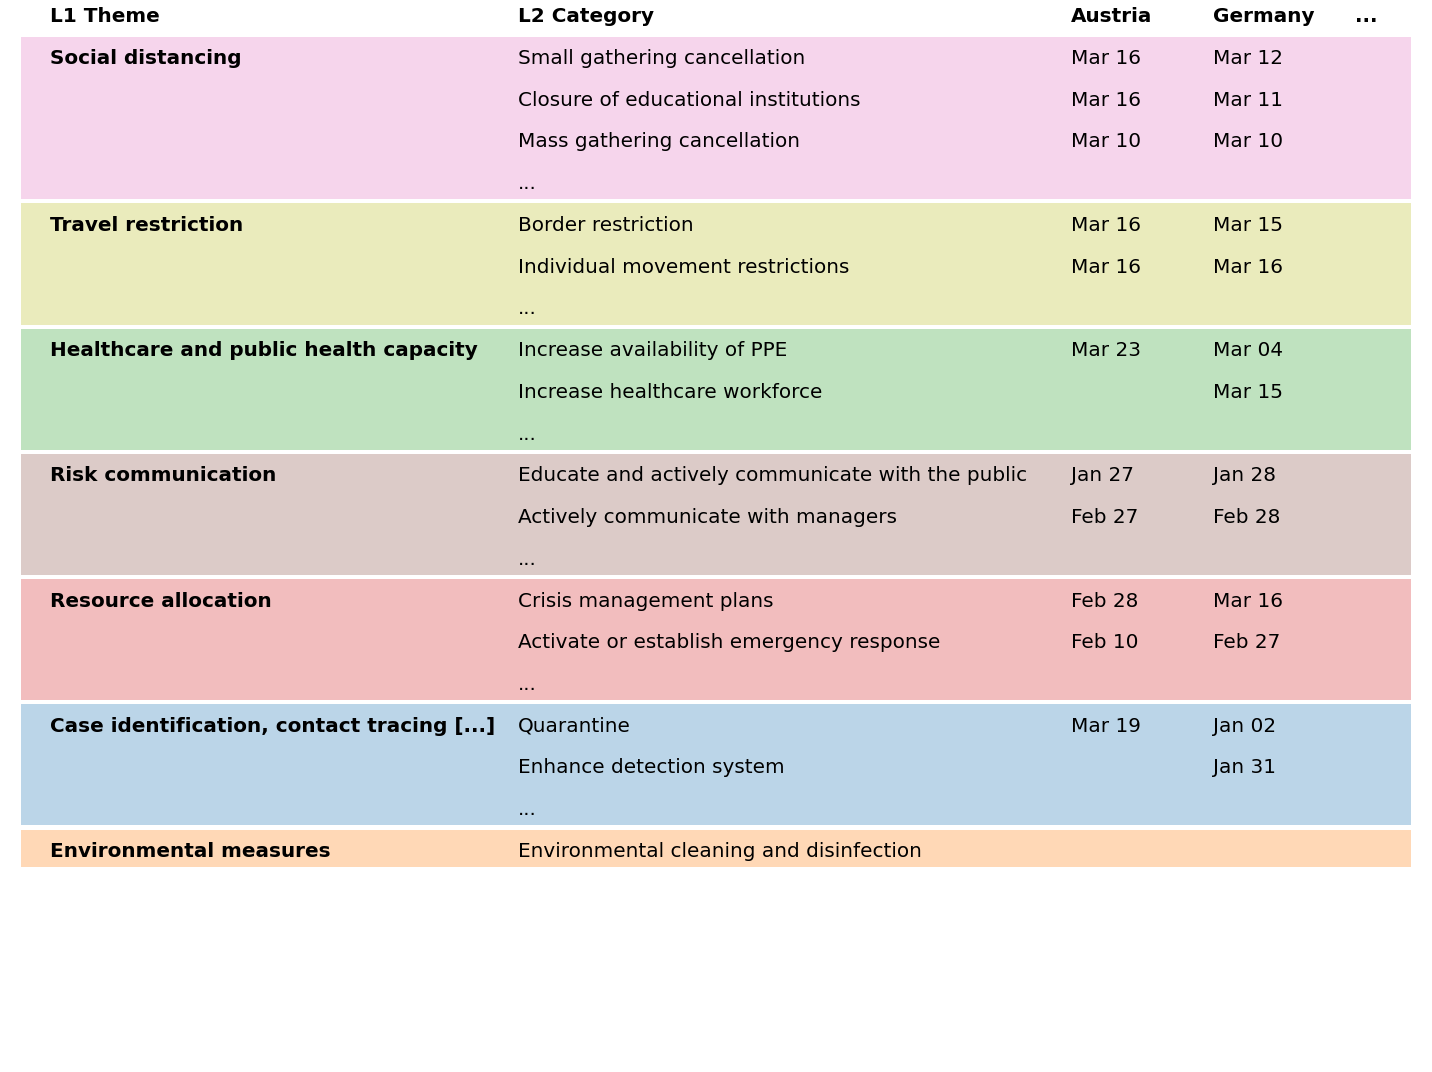

In [23]:
L1order = [
'Social distancing',
'Travel restriction',
'Healthcare and public health capacity',
'Risk communication',
'Resource allocation',
'Case identification, contact tracing and related measures',
'Environmental measures']
L1maxmeasures = [3,2,2,2,2,2,1]

show_countries = ['Austria', 'Germany']

lineheight   = 0.04
fontsize     = 20
l1pos        = 0.03
l2pos        = 0.36
countrypos   = 0.75
countrywidth = 0.10

fig,ax = plt.subplots(1,1, figsize = (20,15))

ax.set_xlim((0,1))
ax.set_ylim((1,0))
ax.axis('off')

i = 1
lasti = 1
ax.annotate('L1 Theme', [l1pos, 0], fontsize = fontsize, weight = 'bold')
ax.annotate('L2 Category', [l2pos, 0], fontsize = fontsize, weight = 'bold')
for j,country in enumerate(show_countries):
    ax.annotate(country, [countrypos + j*countrywidth, 0], fontsize = fontsize, weight = 'bold')
ax.annotate('...', [countrypos + (j+1)*countrywidth, 0], fontsize = fontsize, weight = 'bold')

for l1theme,maxmeasures in zip(L1order,L1maxmeasures):
    ax.annotate(tws(l1theme,45), (l1pos,i*lineheight), weight = 'bold', fontsize = fontsize)
    for measure in data_ranking.merge(getImplementDate(show_countries), on = ['L1 theme', 'L2 category']).query('`L1 theme` == "{}"'.format(l1theme)).sort_values('mean normalized score', ascending = False)[['L2 category'] + show_countries].values[:maxmeasures,:]:
        ax.annotate(tws(measure[0],50), (l2pos, i*lineheight), fontsize = fontsize)
        for j,implementdate in enumerate(measure[1:]):
            ax.annotate(implementdate, [countrypos + j*countrywidth, i*lineheight], fontsize = fontsize)
        i += 1
    if not l1theme == L1order[-1]:
        ax.annotate('...', (l2pos, i*lineheight), fontsize = fontsize)
        i += 1
    background = plt.Rectangle([.01, lasti * lineheight - 0.0255], .98, (i-lasti) * lineheight - .004, fill = True, fc = L1colors[l1theme], alpha = .3)
    
    ax.add_patch(background)
    lasti = i
fig.tight_layout()
fig.savefig('CCCSL.png')
fig.savefig('CCCSL.pdf')


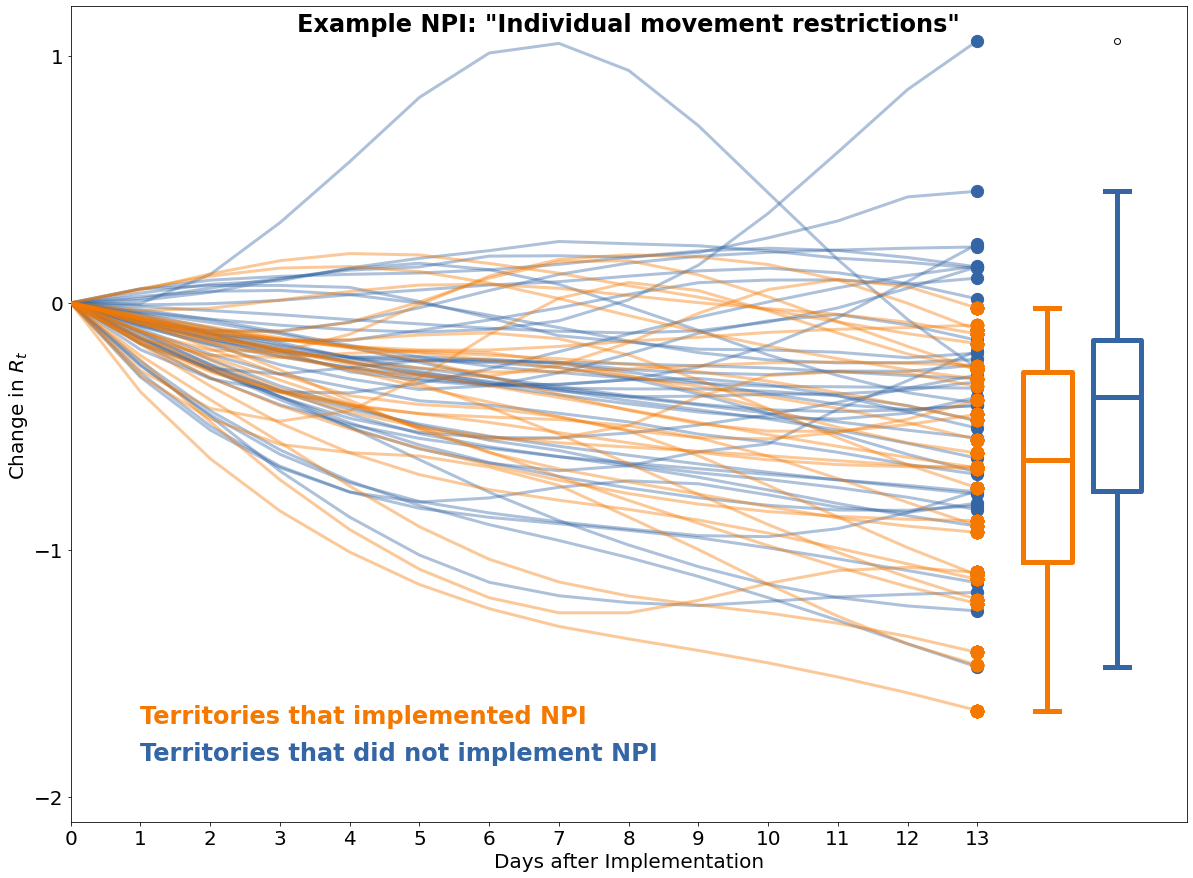

In [61]:
def FormatTime(time, datefmt = '%b %d'):
    if not pd.isnull(time): return pd.to_datetime(time).strftime(datefmt)
    else:                   return ''
    
#def centerRt(firstday, implementday, Rt):
    
np.random.seed(123456)
    
measure = 'Individual movement restrictions'
tau     = 13

implement_histo = np.zeros(60)
not_implemented_countries = {}
fig, ax = plt.subplots(1,1,figsize = (20,15))
end_rt = []
end_rt_ni = []

for country in data['Country'].unique():
    #firstday = np.max(pd.Timestamp(2020,3,1), 
    confirmed = data.query('Country == "{}" and Date>=@pd.Timestamp(2020,3,1) and Date<@pd.Timestamp(2020,4,30)'.format(country)).set_index('Date').Confirmed.diff().dropna()
    firstday = next(iter(confirmed[confirmed >= 30].index.values), None)
    if not firstday is None:
        confirmed = confirmed[confirmed.index >= firstday]
        implementdate = getImplementDate(country, datefmt = None).query('`L2 category` == "{}"'.format(measure))[country].values[0]
        if firstday <= implementdate:
            #print('{:30s} {} {}'.format(country, FormatTime(firstday), FormatTime(implementdate)))
            implement_histo[pd.to_timedelta(implementdate - firstday).days] += 1
            rt = data.query('Country == "{}"'.format(country)).set_index('Date').loc[implementdate: implementdate + pd.Timedelta('{}d'.format(tau))]['R'].values
            rt -= rt[0]
            ax.plot(rt, color = '#f57900', lw = 3, alpha = .4, zorder = 10)
            if not np.isnan(rt[-1]):
                end_rt.append(rt[-1])
        else:
            not_implemented_countries[country] = firstday
    ax.scatter(tau*np.ones_like(end_rt), end_rt, c = '#f57900', s = 150, zorder = 20)
implement_histo = np.array(implement_histo)
#print(implement_histo)
#print(np.ones_like(implement_histo))
for country, firstday in not_implemented_countries.items():
    d = np.random.choice(np.arange(len(implement_histo)),p = implement_histo/np.sum(implement_histo))
    #print(country, d)
    rt = data.query('Country == "{}"'.format(country)).set_index('Date').loc[firstday + pd.Timedelta('{}d'.format(d)): firstday + pd.Timedelta('{}d'.format(d + tau))]['R'].values
    rt -= rt[0]
    ax.plot(rt-rt[0], color = '#3465a4', zorder = -1, lw = 3, alpha = .4)
    if not np.isnan(rt[-1]):
        end_rt_ni.append(rt[-1])

ax.scatter(tau * np.ones_like(end_rt_ni), end_rt_ni, c = '#3465a4', s = 150, zorder = -1)
ax.boxplot(end_rt,    positions = [tau+1], widths = [.7], boxprops = {'color':'#f57900', 'lw':5}, capprops = {'color':'#f57900', 'lw':5}, whiskerprops = {'color':'#f57900', 'lw':5}, flierprops={'color':'#f57900', 'lw':5}, medianprops={'color':'#f57900', 'lw':5})
ax.boxplot(end_rt_ni, positions = [tau+2], widths = [.7], boxprops = {'color':'#3465a4', 'lw':5}, capprops = {'color':'#3465a4', 'lw':5}, whiskerprops = {'color':'#3465a4', 'lw':5}, flierprops={'color':'#3465a4', 'lw':5}, medianprops={'color':'#3465a4', 'lw':5})


ax.set_xticks(np.arange(tau+1))
ax.set_xticklabels(np.arange(tau+1))
ax.set_yticks([1,0,-1,-2])
ax.tick_params(labelsize = 20)
ax.set_xlim([0,tau+3])
ax.set_ylim([-2.1,1.2])

ax.annotate('Example NPI: "{}"'.format(measure), [tau/2+1.5, 1.1], fontsize = 24, weight = 'bold', ha = 'center')

ax.set_xlabel('Days after Implementation', fontsize = 20)
ax.set_ylabel(r'Change in $R_t$', fontsize = 20)
ax.annotate('Territories that implemented NPI',       [1,-1.70], weight = 'bold', fontsize = 24, color = '#f57900')
ax.annotate('Territories that did not implement NPI', [1,-1.85], weight = 'bold', fontsize = 24, color = '#3465a4')

fig.savefig('CC_method.png')
fig.savefig('CC_method.pdf')



#print(implement_histo)
#print(not_implemented_countries)

In [20]:
data_TFpred = pd.read_csv('comparison_of_rankings_revision - Data for prediction_formatted.csv').set_index('Unnamed: 0')

epidemic_age = {"US - California": "2020-03-10",
"US - New York": "2020-03-07",
"United Kingdom": "2020-03-01",
"Germany": "2020-02-29",
"Italy": "2020-02-22"}

countries = list(epidemic_age.keys())

print(countries)
print(data_TFpred.columns)

['US - California', 'US - New York', 'United Kingdom', 'Germany', 'Italy']
Index(['US - California Data', 'US - California Transformer',
       'US - New York Data', 'US - New York Transformer',
       'United Kingdom Data', 'United Kingdom Transformer', 'Germany Data',
       'Germany Transformer', 'Italy Data', 'Italy Transformer'],
      dtype='object')


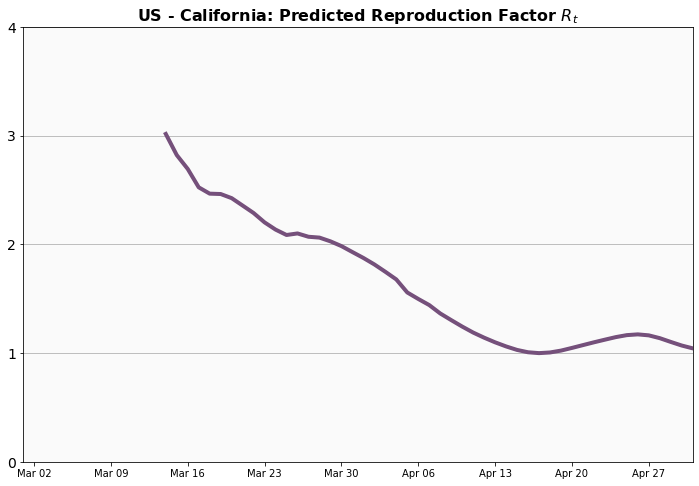

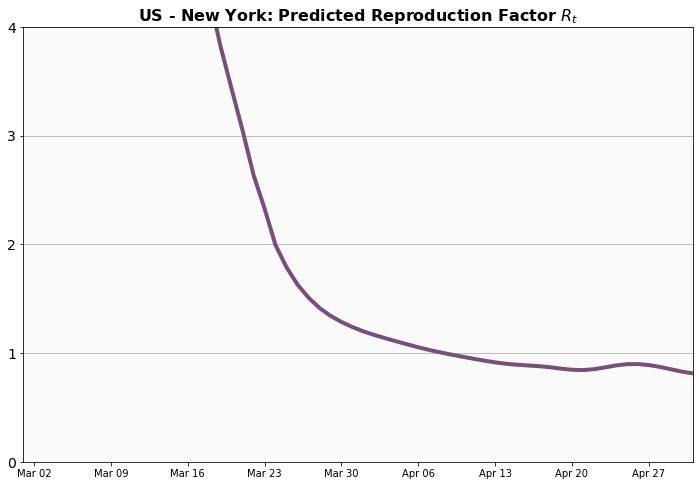

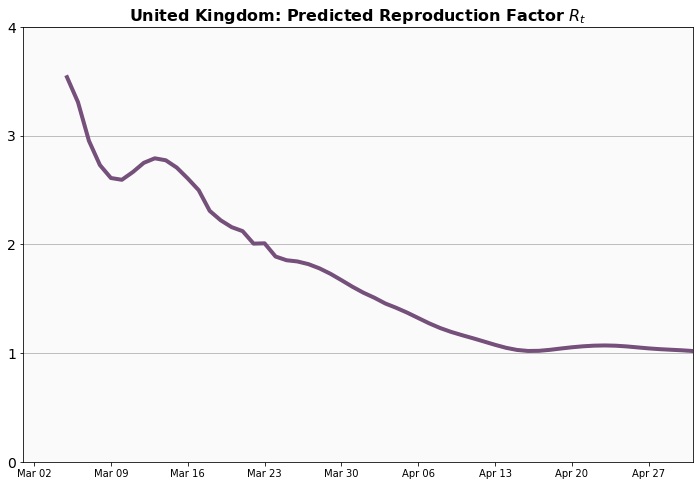

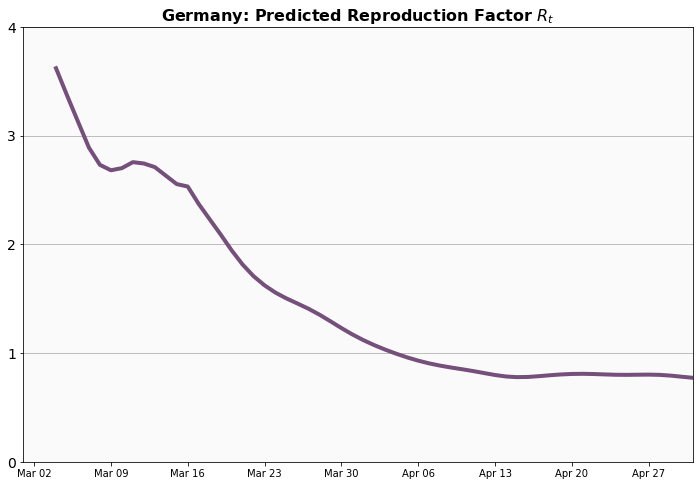

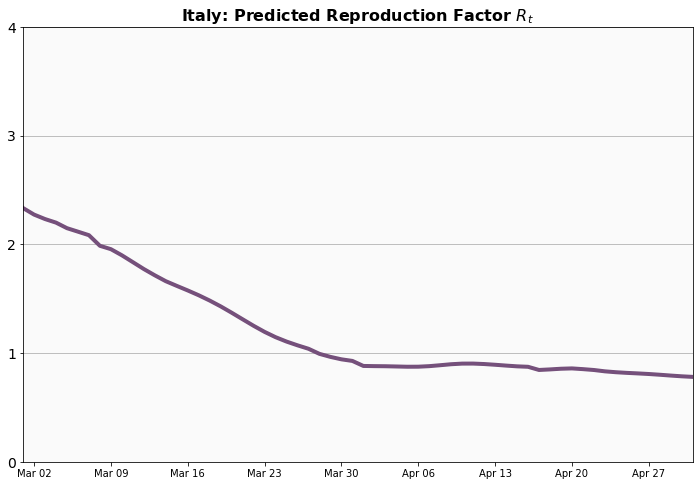

In [23]:
for country in countries:

    #plotdata  = data.query("Country=='{}'".format(country)).set_index("Date").loc["2020-3-1":"2020-05-01"]
    #plotdata  = plotdata.set_index(pd.date_range("2020-03-1","2020-05-01",freq="D")).R.dropna()
    #print(plotdata, startindex[country])
    #plotdata1 = plotdata[plotdata.index <= startindex[country]]
    #plotdata2 = plotdata[plotdata.index >= startindex[country]]
    
    plotdata = data_TFpred['{} Transformer'.format(country)].dropna()
    plotdates = [pd.to_datetime(epidemic_age[country]) + pd.Timedelta('{} days'.format(x)) for x in plotdata.index.values]
    
    fig,ax = plt.subplots(1,1,figsize = (12,8))
    

    ax.plot(plotdates, plotdata.values, linewidth=4, color='#75507b')
    
    plt.grid(axis='y')
    plt.title(r"{}: Predicted Reproduction Factor $R_t$".format(country),fontsize=16, weight = 'bold')
    #plt.xlabel("Date",fontsize=16)
    ticks_time = pd.date_range("2020-03-1","2020-05-01",freq="W-MON")
    ticks_label = [x.strftime('%b %d') for x in ticks_time]
    ax.set_xlim(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-05-01'))
    plt.xticks(ticks_time, ticks_label)
    plt.yticks(np.arange(5))
    ax.tick_params(axis="y",labelsize=14)
    ax.tick_params(axis="x",which='major',labelsize=10)
    ax.tick_params(axis="x",which='minor',labelsize=0)
    ax.set_facecolor([.97,.97,.97, .5])
    #ax.plot([pd.Timestamp(2020,3,10),pd.Timestamp(2020,3,10)],[0,1500],color="grey",linestyle="dashed")
    #ax.plot([pd.Timestamp(2020,3,15),pd.Timestamp(2020,3,15)],[0,1500],color="grey",linestyle="dashed")
    plt.axis(ymin=0,ymax=4,xmin=pd.Timestamp(2020,3,1))
    plt.savefig("cov_TFpred_{}.png".format(country))
    plt.savefig("cov_TFpred_{}.pdf".format(country))
    plt.show()